In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# IMAGE_SIZE1 = 142
# IMAGE_SIZE2 = 107
IMAGE_SIZE = 256
BATCH_SIZE=16
CHANNELS =3
EPOCHS =50

In [30]:
 dataset =tf.keras.preprocessing.image_dataset_from_directory("SMARTPHONE",
                                                   shuffle=True,
                                                   image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                  batch_size = BATCH_SIZE)

Found 528 files belonging to 3 classes.


In [31]:
class_names = dataset.class_names 
class_names

['avg', 'good', 'poor']

In [32]:
len(dataset)

33

In [34]:
33*16

528

In [35]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(16, 256, 256, 3)
[1 1 1 1 1 1 1 2 0 1 1 2 2 2 2 1]


In [36]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[ 39.625     28.5       32.5     ]
  [ 33.95703   24.957031  27.957031]
  [ 30.480469  24.257812  24.332031]
  ...
  [ 49.921875  48.546875  44.820312]
  [ 53.33203   49.33203   48.33203 ]
  [ 52.125     48.125     47.125   ]]

 [[ 31.113281  22.113281  25.113281]
  [ 32.0625    26.0625    28.0625  ]
  [ 30.949219  26.949219  25.949219]
  ...
  [ 45.1875    40.59375   37.59375 ]
  [ 52.960938  46.960938  46.960938]
  [ 46.57422   42.57422   41.57422 ]]

 [[ 32.867188  26.367188  24.867188]
  [ 32.621094  25.6875    23.488281]
  [ 33.898438  27.855469  26.203125]
  ...
  [ 53.007812  49.265625  44.63672 ]
  [ 50.953125  45.953125  42.953125]
  [ 48.929688  42.804688  40.179688]]

 ...

 [[112.16406   99.16406   90.78906 ]
  [109.24609   97.99609   85.99609 ]
  [107.5625    95.5625    82.30469 ]
  ...
  [ 51.6875    41.6875    40.3125  ]
  [ 76.671875  64.671875  67.30469 ]
  [ 80.45703   66.00781   67.25    ]]

 [[105.47656   92.47656   86.47656 ]
  [100.15625   90.15625   81.15625 ]


In [37]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


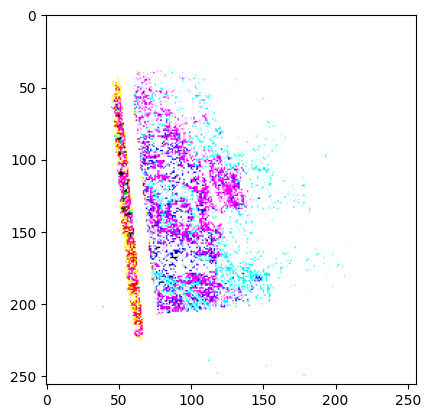

In [40]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())

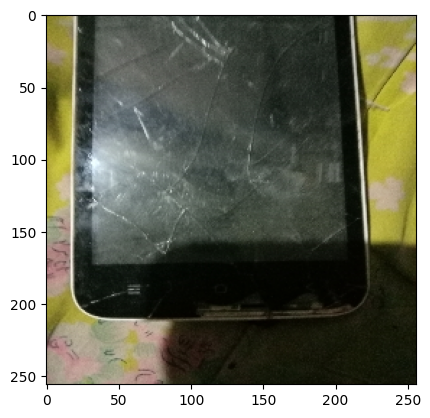

In [41]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

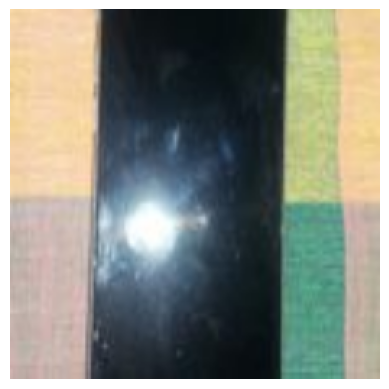

In [42]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    # it shuffles image everytime we run 

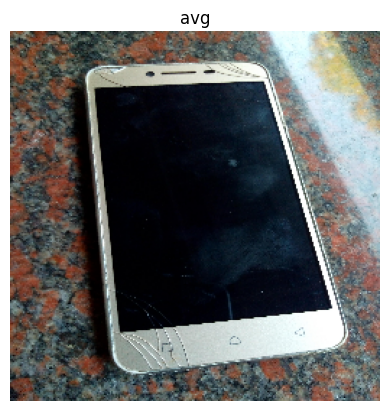

In [43]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    # it shuffles image everytime we run 

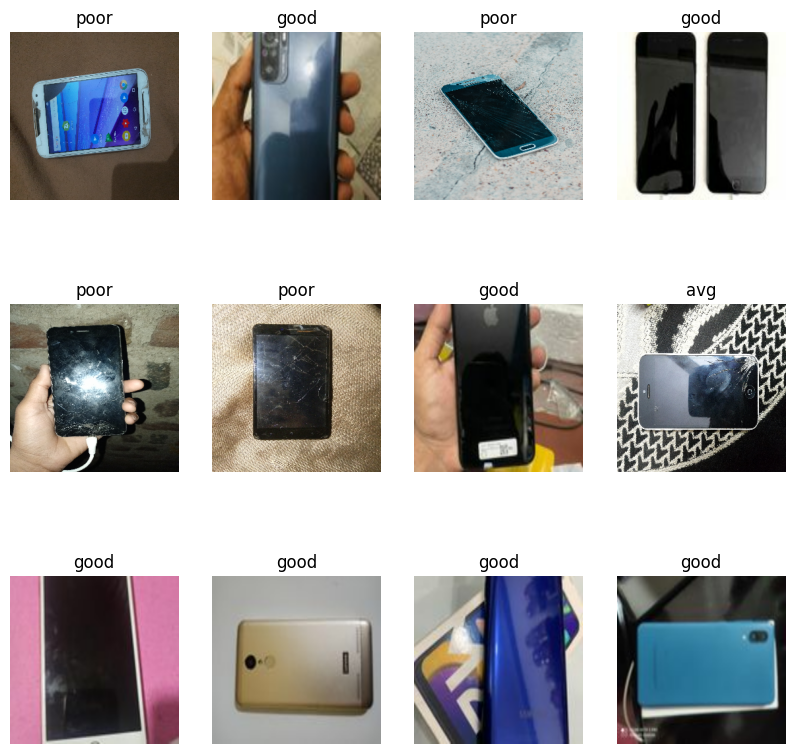

In [44]:
# for displaying i number of images in for loop 
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        # it shuffles image everytime we run 

In [ ]:
# each element is 16 batch 
#dividing dataset into training testing data 
# 80% ==>training data 
# 20% ==> 10% ==> validation ,10% ==> test 
# since we do not have train_test_split in tf

In [45]:
train_size =0.8
len(dataset)*train_size

26.400000000000002

In [46]:
train_ds=dataset.take(26)

In [47]:
len(train_ds)

26

In [50]:
test_ds= dataset.skip(26)

In [51]:
len(test_ds)

7

In [52]:
val_size=0.1
len(dataset)*val_size

3.3000000000000003

In [53]:
val_ds=test_ds.take(3)


In [54]:
len(val_ds)

3

In [55]:
test_ds=test_ds.skip(3)

In [56]:
len(test_ds)

4

In [57]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split =0.1,shuffle = True,shuffle_size=10000):
    ds_size =len(ds)
    if shuffle :
        ds=ds.shuffle(shuffle_size,seed =12)
    
    
    train_size = int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    
    train_ds=dataset.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    
    return train_ds,val_ds,test_ds


In [58]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [59]:
len(train_ds)

26

In [60]:
len(test_ds)

4

In [61]:
len(val_ds)

3

In [62]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [63]:
 resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [64]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),])

In [65]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model = models.Sequential ([ resize_and_rescale,
                              data_augmentation,
                              layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Flatten(),
                              layers.Dense(64,activation='relu'),
                              layers.Dense(n_classes,activation='softmax'),
                           
                           
                          ])
model.build(input_shape=input_shape)

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (16, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (16, 62, 62, 64)         0         
 2D)                                                  

In [67]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [70]:
history =model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
26/26 [==============================] - 27s 1s/step - loss: 0.9809 - accuracy: 0.5721 - val_loss: 0.8864 - val_accuracy: 0.5833
Epoch 2/50
26/26 [==============================] - 29s 1s/step - loss: 0.9294 - accuracy: 0.5721 - val_loss: 0.8611 - val_accuracy: 0.5833
Epoch 3/50
26/26 [==============================] - 29s 1s/step - loss: 0.8965 - accuracy: 0.5865 - val_loss: 0.7678 - val_accuracy: 0.6042
Epoch 4/50
26/26 [==============================] - 27s 1s/step - loss: 0.7044 - accuracy: 0.7019 - val_loss: 0.4073 - val_accuracy: 0.8333
Epoch 5/50
26/26 [==============================] - 27s 1s/step - loss: 0.8684 - accuracy: 0.6995 - val_loss: 0.7397 - val_accuracy: 0.7708
Epoch 6/50
26/26 [==============================] - 27s 1s/step - loss: 0.6904 - accuracy: 0.7452 - val_loss: 0.5502 - val_accuracy: 0.6875
Epoch 7/50
26/26 [==============================] - 27s 1s/step - loss: 0.5144 - accuracy: 0.7957 - val_loss: 0.4584 - val_accuracy: 0.8750
Epoch 8/50
26/26 [==

In [72]:
scores=model.evaluate(test_ds)

4/4 [==============================] - 1s 249ms/step - loss: 0.3345 - accuracy: 0.8906


In [73]:
scores

[0.3345343768596649, 0.890625]

In [74]:
history

In [75]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 26}

In [76]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [77]:
history.history['accuracy']

[0.5721153616905212,
 0.5721153616905212,
 0.5865384340286255,
 0.7019230723381042,
 0.6995192170143127,
 0.745192289352417,
 0.7956730723381042,
 0.78125,
 0.7836538553237915,
 0.7956730723381042,
 0.807692289352417,
 0.807692289352417,
 0.8197115659713745,
 0.7884615659713745,
 0.7379807829856873,
 0.8245192170143127,
 0.817307710647583,
 0.8100961446762085,
 0.8413461446762085,
 0.8269230723381042,
 0.8341346383094788,
 0.84375,
 0.8269230723381042,
 0.8461538553237915,
 0.8269230723381042,
 0.8293269276618958,
 0.8509615659713745,
 0.8413461446762085,
 0.8725961446762085,
 0.8605769276618958,
 0.8581730723381042,
 0.838942289352417,
 0.838942289352417,
 0.870192289352417,
 0.875,
 0.8317307829856873,
 0.848557710647583,
 0.838942289352417,
 0.8557692170143127,
 0.8581730723381042,
 0.875,
 0.90625,
 0.879807710647583,
 0.8461538553237915,
 0.8822115659713745,
 0.8894230723381042,
 0.8365384340286255,
 0.879807710647583,
 0.8846153616905212,
 0.8725961446762085]

In [78]:
len(history.history['accuracy'])

50

In [79]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']


loss = history.history['loss']
val_loss =history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

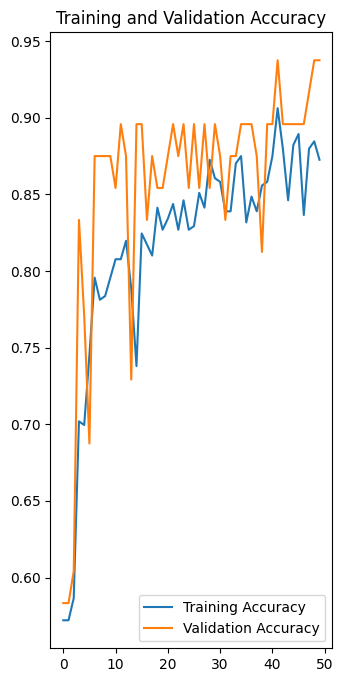

In [80]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

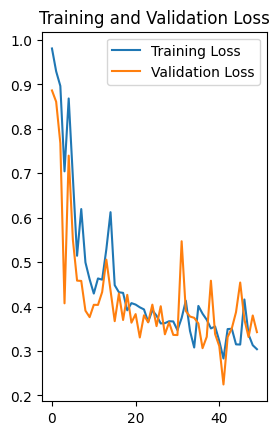

In [81]:
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

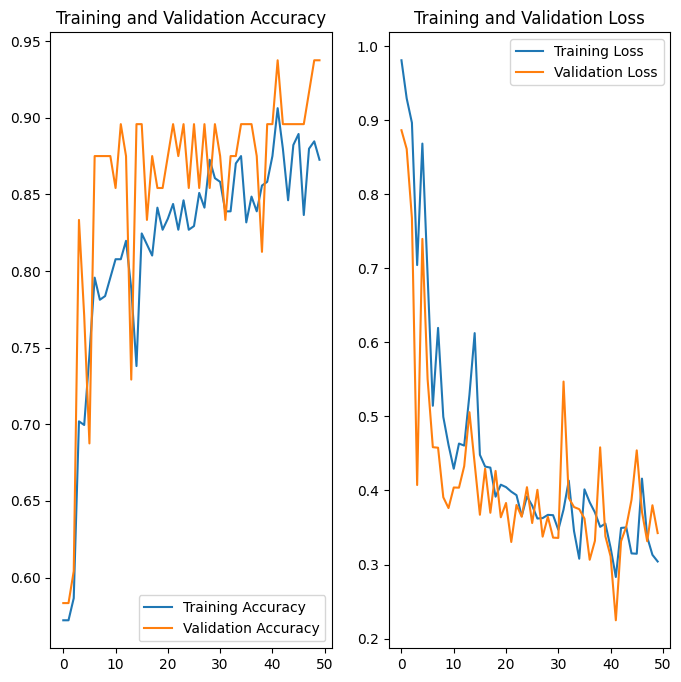

In [82]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict 
first image's actual label: good
1/1 [==============================] - 1s 589ms/step
[0.02149685 0.97550666 0.00299653]
predicted label : good


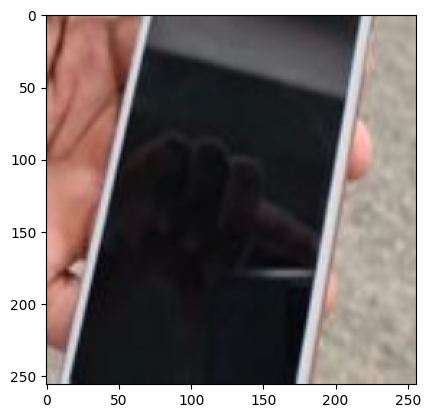

In [83]:
for image_batch,label_batch in dataset.take(1):
    first_image=(image_batch[0].numpy().astype("uint8"))
    first_label=label_batch[0].numpy()
    
    print("first image to predict ")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(batch_prediction[0])
    print("predicted label :",class_names[np.argmax(batch_prediction[0])])

In [84]:
np.argmax([9.8737389e-01, 1.2625645e-02 ,4.9305282e-07])

0

In [85]:
def predict(model,img):
    img_array= tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array= tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 49ms/step


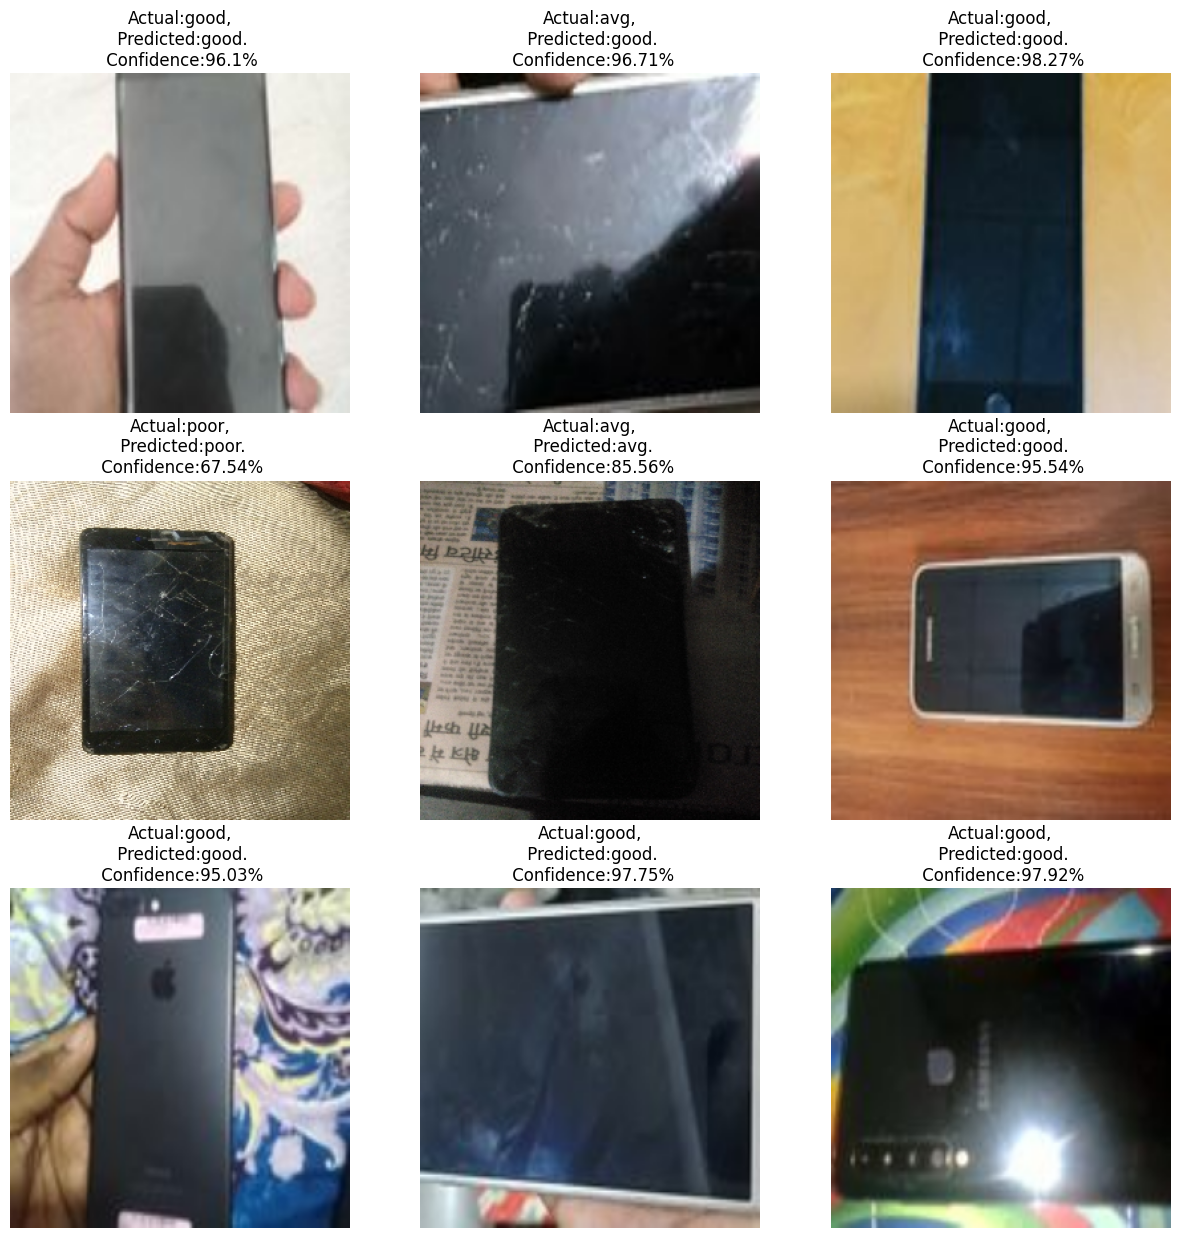

In [86]:
plt.figure(figsize=(15,15))
for image,labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,image[i].numpy())
        
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")

In [87]:
import os
model_version=1
model.save("smartphone_health_predictor_model")

INFO:tensorflow:Assets written to: smartphone_health_predictor_model\assets


INFO:tensorflow:Assets written to: smartphone_health_predictor_model\assets


In [90]:
import os
model_version = max([int(i) for i in (os.listdir("./model_versions")+[0])])+1
model.save(f"./model_versions/{model_version}")

INFO:tensorflow:Assets written to: ./model_versions/2\assets


INFO:tensorflow:Assets written to: ./model_versions/2\assets
